<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Xareny González,  Estefanía Meza, Alejandra Rico

**Fecha:** 14 de octubre del 2021.

**Expediente** : 720811, 729930, 720838.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: [Link con el enlace del repositorio del creador del proyecto](https://github.com/Xarenyglp/ProyectoM1_GonzalezX_MezaE_RicoA)

# Proyecto TEMA 1

## 1.1 Causas de Enfermedades Cardiovasculares

<img src="cora.jpg">

## 1.2 Objetivos

### Objetivo General

> A lo largo del proyecto se pretendrá encontrar qué causas provocan que las personas sean más propensas a desarrollar una enfermedad cardiovascular. 

### Objetivos Específicos

> Simular la probabilidad de casos en donde las personas sufran de una enfermedad cariovascular considerando los siguientes datos:

>* **Age:** edad 
>* **Sex:** sexo 
>* **ChestPainType:** tipo de dolor de pecho (*TA:* angina típica, *ATA:* angina atípica, *NAP:* dolor no anginal, *ASY:* asintomático)
>* **Resting BP:** presión arterial en reposo (mm Hg)
>* **Cholesterol:** colesterol (mm/dl)
>* **Fasting BS:** azúcar en sangre en ayunas (1: si BS en ayunas> 120 mg/dl, 0: en caso contrario)
>* **Resting ECG:** resultados de electrocardiograma en reposo (*Normal:* Normal, *ST:* con anomalía de la onda ST-T, inversiones de la onda T y/o elevación o depresión del ST> 0.05 mV, *HVI:* muestra una hipertrofia ventricular izquierda probable o definitiva según los criterios de estes)
>* **MaxHR:** frecuencia cardíaca máxima alcanzada (Valor numérico entre 60 y 202)
>* **ExerciseAngina:** angina inducida por el ejercicio (Y: Sí, N: No)
>* **Oldpeak:** oldpeak = ST (Valor numérico medido en depresión)
> * **ST_Slope:** pendiente del segmento ST del ejercicio pico (*Up:* uploping, *Flat:* flat, *Down:* downsloping)
>* **HeartDisease:** clase de salida (1: enfermedad cardíaca, 0: normal)

Referencia: https://www.kaggle.com/fedesoriano/heart-failure-prediction

## 1.3 Definición del problema

> Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial, cobrando un estimado de 17,9 millones de vidas cada año, lo que representa el 31% de todas las muertes en todo el mundo. Cuatro de cada 5 muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en personas menores de 70 años. La insuficiencia cardíaca es un evento común causado por las ECV y este conjunto de datos contiene 11 características que pueden usarse para predecir una posible enfermedad cardíaca.

> Las personas con enfermedad cardiovascular o que se encuentran en alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y manejo precoces donde un modelo de aprendizaje automático puede ser de gran ayuda.

Referencia: https://www.paho.org/es/temas/enfermedades-cardiovasculares

## 1.4 Nodos y variables que se decidieron simular y porqué

> Para el análisis de esta base de datos nos enfocaremos en las siguientes variables, las cuales consideramos son las más significativas y marcan una diferencia más generalizada en la población:
* **Age:** edad
* **Cholesterol:** colesterol
* **Resting BP:** Presión alta en reposo
* **MaxHR:** frecuencia cardiaca máxima


<img src="df.jpg">

## 1.5 Definición de hipótesis y supuestos

### Hipótesis

* Las personas con una frecuencia cardíaca alta y colesterol alto son propensas a tener problemas cardiacos.

* El rango de edad para desarrollar una enfermedad cardíaca es entre los 55-70 años de edad.

### Supuestos

* Los datos estan distribuidos de forma normal.
* La probabilidad de desarrollar alguna enfermadad influye directamente con todos los síntomas planteados.

## 1.6 Obtención de la base de datos

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import scipy.stats as st
import statsmodels.api as sm 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [123]:
ecv = pd.read_csv('heart.csv').dropna()
ecv

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


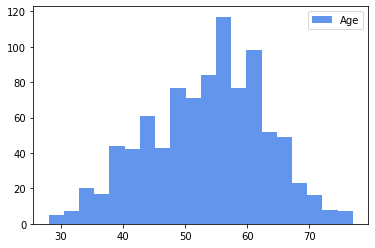

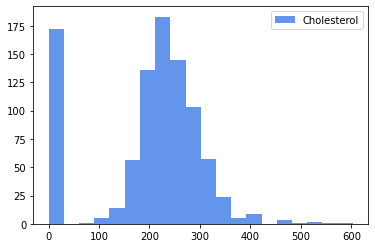

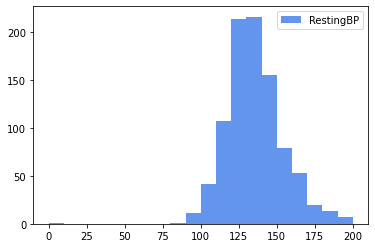

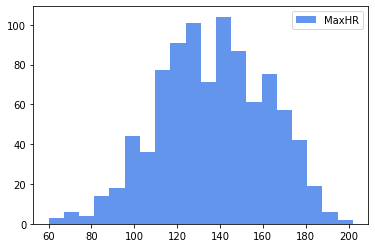

In [124]:
nodos = ['Age','Cholesterol', 'RestingBP', 'MaxHR']
for i in range(4):
    plt.hist(ecv[nodos[i]],bins=20,label=nodos[i],color='cornflowerblue')
    plt.legend()
    plt.show()

## 1.7 Visualización de resultados de simulación.

In [137]:
def kde_sklearn(x, x_grid, bandwidth, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

def generador_vad(proba_acum: 'Probabilidad acumulada', indices: 'Valores por generar', N: 'Aleatorios por generar'):
    diccionario = {i: idx for i, idx in enumerate(indices)}
    U = np.random.rand(N)
    y = pd.Series([sum([1 for p in proba_acum if p < ui]) for ui in U]).map(diccionario)
    return y

def kde_sklearn_mod(x, bandwidth, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x_grid: np.exp(kde_skl.score_samples(x_grid[:, np.newaxis])) if isinstance(x_grid, np.ndarray) else \
        np.exp(kde_skl.score_samples(np.array[x_grid])[:, np.newaxis])
    return pdf

def muestreo_est(B: 'Número de estratos'):
    u= np.random.uniform(B) 
    i=np.arange(0,B) 
    v = (u+i)/B 
    return v 
    
# Función que hace las pruebas para ver una distribución que se ajuste mejor al nodo    
def prueba_dist(nodo: "Nodo a estudiar", bins: 'bins'):
    '''
    Esta función de devuelve que una gráfica en donde se ve como le quedan distintas distribuciones
    arbitrarias al nodo que el usuario debe ingresar a estudiar, además del orden de menor a menor
    de las distribuciones que se podrán usar más adelante.
    '''
    d_continuas = [d for d in dir(st) if isinstance(getattr(st, d), getattr(st, "rv_continuous"))]

    y, x, _ = plt.hist(nodo, bins=bins, density=True)
    x = x[1:]

    error = pd.DataFrame(columns = ["distribución", "error"])
    i = 0

    for d in d_continuas[10:20]:
        try:
            params = getattr(st, d).fit(nodo)
            y_hat = getattr(st, d)(*params).pdf(x)
            error.loc[i, :] = [d, np.mean(np.abs((y - y_hat)/y))] #Error MAPE
            plt.plot(x, y_hat, label = d)
            i += 1
        except:
            pass
    plt.legend()
    plt.show()

    error.set_index("distribución", inplace=True)
    print(error.sort_values("error"))   
    

# Función que hace la prueba Q_Q y nos muestra la gráfica.    
def q_q(nodo: "Nodo a simular", distr:"Distribución a comparar"):
    '''
    Esta función te arroja como se acomoda la distribución elegida (como entrada),
    del nodo introducido.
    '''
    # Histograma de las variables creadas
    divisiones = 20 # Cantidad de barras en el histograma
    fig, ax = plt.subplots(2,1, figsize=(8,10))
    fig.tight_layout(pad=3.0)

    y, x, _ = ax[0].hist(nodo, divisiones, density=True, label='Histograma mediciones')

    # Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
    # RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
    dist = distr
    params = getattr(st, dist).fit(nodo)

    # Graficar PDF de la distribución que queremos probar

    # x = np.arange(measurements.min(), measurements.max(), .01)
    y_hat = getattr(st, dist).pdf(x, *params)
    ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
    ax[0].set_ylabel('Probabilidad')
    ax[0].grid()

    grap1 = sm.qqplot(nodo, dist=getattr(st, dist), line='q', fit=True, ax=ax[1])
    ax[1].grid()
    ax[1].set_title('Paquete stats')   
    
def complementarios_1(N):
    a = np.random.rand(int(N/2))
    b = 1-a
    return np.concatenate((a,b))
    
# Asignación de variables para los nodos
edad = np.array(ecv['Age'])
colesterol = np.array(ecv["Cholesterol"])
presion = np.array(ecv["RestingBP"])
frecuencia = np.array(ecv["MaxHR"])

> Primero se eliminan los **valores atípicos** de los nodos ya que hacen que la distribución varíe más y, por lo tanto, reduce el poder estadístico.

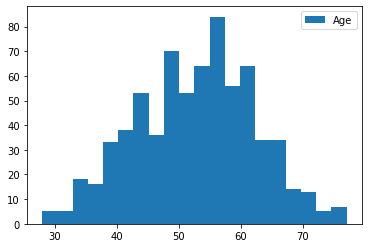

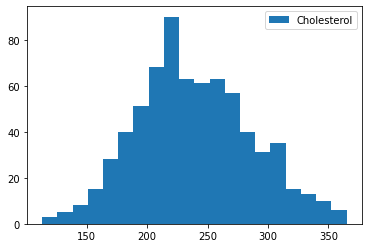

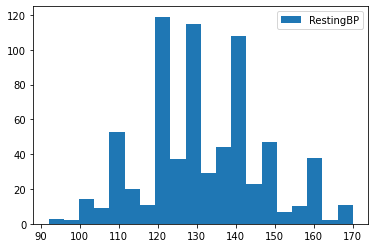

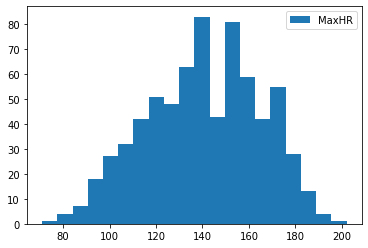

In [141]:
for f in nodos:
    q1,q3= np.percentile(ecv[f],[25,75])
    iqr = q3 - q1
    minimo = q1-(1.5 * iqr) 
    maximo = q3+(1.5 * iqr)
    ecv = ecv[(ecv[f]>=minimo) & (ecv[f]<=maximo)]

for i in range(4):
    plt.hist(ecv[nodos[i]],bins=20,label=nodos[i])
    plt.legend()
    plt.show()

### NODO EDAD

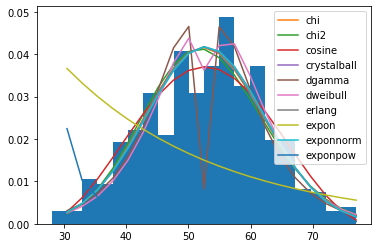

                 error
distribución          
dweibull      0.217483
crystalball   0.230849
exponnorm     0.230856
erlang        0.236539
chi           0.237662
chi2          0.250219
cosine        0.267124
dgamma        0.286897
exponpow       1.24832
expon          1.66134


In [139]:
prueba_dist(edad, 20)

> Se puede observar que la distribución que presenta un menor error es **dweibull**

> Se procede a hacer la pueba *Quartil Quartil* para la función de distribición que tuvo menos error.

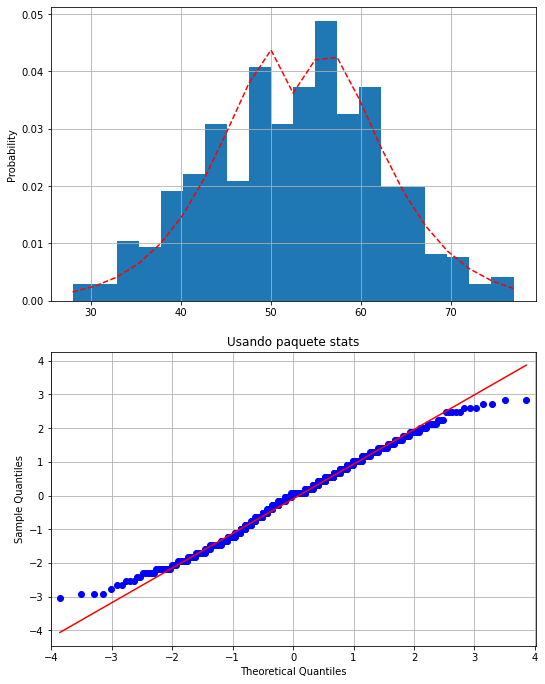

In [142]:
q_q(edad, "dweibull")

> Observando la prueba de Quartil Quartil, se puede ver como en efecto, la distribución **dweibull** se ajusta muy bien a los datos, los puntos se acoplan casi perfectamente a la línea. 

In [100]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(2, 100, 30)},
                    cv=50) # 20-fold cross-validation
grid.fit(edad[:, None])
print(grid.best_params_)

{'bandwidth': 2.0}


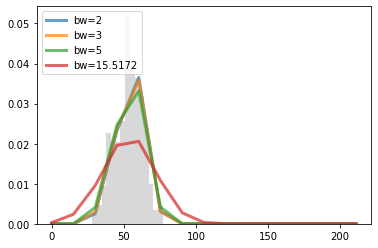

In [101]:
# KDE: Estimar el bandwith correcto con una función para optimizar el proceso
fig, ax = plt.subplots()
for bandwidth in [2,3,5, 15.5172]:
    ax.plot(np.linspace(0,211,15), kde_sklearn(edad, np.linspace(0,211,15), bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(edad, 15, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')

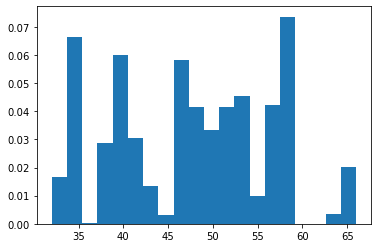

media mu =47.542800, desviación estándar muestral =8.832178
53.510893246187365 9.427477516153495


In [102]:
# Reducción de varianza y Montecarlo
N=10000

f_1=kde_sklearn_mod(edad, 2)
proba = f_1(np.arange(0,191,.4))
f_acum = proba.cumsum()

# Utilizamos el método estratificado
u = muestreo_est(N)
funcion2 = lambda u: (generador_vad(f_acum, edad, N))
o=funcion2(u).values

# Reducción por complementarios

complements=complementarios_1(N)
funcion2_1 = lambda u: (generador_vad(f_acum, edad, N))
o_2=funcion2(u).values

J = 20  # Cantidad de particiones del histograma

y, x, _ = plt.hist(o, J, density=True)
plt.show()

# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral
mu = np.mean(o)
sigma = np.std(o)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))
print(edad.mean(), edad.std())

In [103]:
o_2.mean(),o.mean(), edad.mean()

(47.5028, 47.5428, 53.510893246187365)

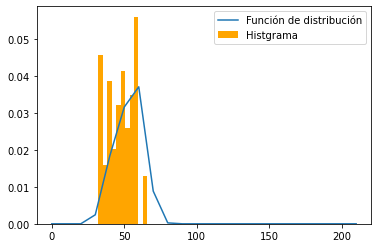

In [104]:
# Comparamos el histograma de "o" (10000 simulaciones del ataque, en función de su distribución de probabilidad)
plt.hist(o, bins=11, density = True, color = 'orange',label='Histgrama')
plt.plot(np.arange(0,211,10),f_1(np.arange(0,211,10)),label='Función de distribución')
plt.legend()
plt.show()

In [105]:
# Nombramos la distribución y realizamos la prueba de chi2, prueba de hipótesis de que la distribución
# es exponnorm
dist = "exponnorm"
pi = getattr(st, dist).pdf(x, *getattr(st, dist).fit(o))

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = len(getattr(st, dist).fit(o)) # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  25.379802126513642
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=25.379802126513642, pvalue=0.14841668813401407)
Estadístico de chi_cuadrado =  26.29622760486423
Media muestral =  47.5428 
Desviación estándar muestral =  8.832177996394774


In [68]:
# Otra prueba de hipótesis, con la media simulando a que es 80
media = edad.mean()
sd = edad.std()
N = len(edad)

# Nivel de confianza
confianza = 0.95

# Datos reales
X = edad

# Hipótesis nula
media2 = 80

# Realizamos la prueba de hipótesis para H0= mu=media2
ho = st.ttest_1samp(X, media2)
print('La prueba de hipótesis arroja como resultado\n',ho)

# Calculamos el estadístico normalizado
t = (np.mean(X) - media2)/(np.std(X) / np.sqrt(N))
print('Cálculo del estadístico de prueba teórico=', t)

# Cálculo de la región de rechazo
confianza_ph = 0.05
cuantil = st.t(N-1).cdf(1-confianza_ph/2)
print(f'Región de rechazo = (t<{-cuantil}) U (t>{cuantil})')

La prueba de hipótesis arroja como resultado
 Ttest_1sampResult(statistic=-75.44646859692801, pvalue=0.0)
Cálculo del estadístico de prueba teórico= -75.50010988958928
Región de rechazo = (t<-0.83505218444221) U (t>0.83505218444221)


In [106]:
# Nivel de confianza, y su intérvalo.

# Parámetros de los datos reales
confianza = .95
media = edad.mean()
sd = edad.std()

# Intervalo de confianza usando t-student
i1 = st.t.interval(confianza, len(edad)-1, loc=np.mean(edad), scale=st.sem(edad))

print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s' %(confianza,i1))
print('Media calculada' ,np.mean(edad))

o.mean()

Con una confianza de 0.95 la media estará en el intervalo t,
 (52.899905462211464, 54.121881030163266)
Media calculada 53.510893246187365


47.5428

## 1.8 Conclusiones

## Referencias